In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn
from sklearn import preprocessing, svm
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import datetime

# Data analysis and features creation

In [2]:
missing = ['','NaN']
bienici = pd.read_csv("../data_base_creation/results/scraping_bienici.csv", na_values = missing)
np.shape(bienici)

(7014, 26)

In [3]:
bienici.head(3)

,url,scraping_date,title,price,charges,place,surface,construction_year,description,number_pictures,...,lift,contact,contact_address,contact_rcs,contact_type,ref_annonce,publication_date,modification_date,infos_quartier,other_info
0,https://www.bienici.com/annonce/location//appa...,2016-10-09@00:30,Appartement 2 pièces 36 m²,1150.0,70.0,- Grandes Carrières - Clichy,36.0,NaN,Description HTML_format -- Haut Rue Damr&eacut...,6,...,NaN,Acopa Damrémont,19 Rue Damrémont - 75018 Paris,RCS : 512097031,Agence,3987,5 oct. 2016,NaN,"<span><a href=""/decouvrez/paris/paris-18e/gran...",Exposé Est \n\&\\n1 WC\n\&\\n
1,https://www.bienici.com/annonce/location//appa...,2016-10-09@00:30,Appartement 2 pièces 36 m²,1150.0,70.0,- Grandes Carrières - Clichy,36.0,NaN,Description HTML_format -- Haut Rue Damr&eacut...,6,...,NaN,Acopa Damrémont,19 Rue Damrémont - 75018 Paris,RCS : 512097031,Agence,3989,6 oct. 2016,NaN,"<span><a href=""/decouvrez/paris/paris-18e/gran...",Exposé Est \n\&\\n1 WC\n\&\\n
2,https://www.bienici.com/annonce/location//appa...,2016-10-09@00:30,Appartement 3 pièces 85 m²,2165.0,165.0,- Jules Joffrin,85.0,NaN,Description HTML_format -- Appartement 3/4 pi&...,11,...,NaN,Acopa Immobilière Marcadet,77 Bd Barbes - 75018 Paris,RCS : 70305443384,Agence,3956,16 sept. 2016,NaN,"<span><a href=""/decouvrez/paris/paris-18e/jule...",NaN


In [4]:
bienici.columns

Index(['url', 'scraping_date', 'title', 'price', 'charges', 'place', 'surface',
       'construction_year', 'description', 'number_pictures', 'furnished',
       'number_rooms', 'number_bedrooms', 'number_bathromms', 'floor',
       'heating', 'lift', 'contact', 'contact_address', 'contact_rcs',
       'contact_type', 'ref_annonce', 'publication_date', 'modification_date',
       'infos_quartier', 'other_info'],
      dtype='object')

In [5]:
infos_quartiers = bienici["infos_quartier"].copy()

In [6]:
# Remove useless columns
# I do not keep modification dates, because this feature is not available, in other sites
bienici = bienici[['price', 'charges', 'place', 'surface',
       'construction_year', 'description', 'number_pictures', 'furnished',
       'number_rooms', 'number_bedrooms', 'number_bathromms', 'floor',
       'heating', 'lift', 'publication_date',
       'infos_quartier', 'other_info']]

In [7]:
np.shape(bienici)

(7014, 17)

In [8]:
bienici.head(5)

,price,charges,place,surface,construction_year,description,number_pictures,furnished,number_rooms,number_bedrooms,number_bathromms,floor,heating,lift,publication_date,infos_quartier,other_info
0,1150.0,70.0,- Grandes Carrières - Clichy,36.0,NaN,Description HTML_format -- Haut Rue Damr&eacut...,6,Yes,2.0,1.0,1.0,5e étage (sur 6),gaz individuel,NaN,5 oct. 2016,"<span><a href=""/decouvrez/paris/paris-18e/gran...",Exposé Est \n\&\\n1 WC\n\&\\n
1,1150.0,70.0,- Grandes Carrières - Clichy,36.0,NaN,Description HTML_format -- Haut Rue Damr&eacut...,6,Yes,2.0,1.0,1.0,5e étage (sur 6),gaz individuel,NaN,6 oct. 2016,"<span><a href=""/decouvrez/paris/paris-18e/gran...",Exposé Est \n\&\\n1 WC\n\&\\n
2,2165.0,165.0,- Jules Joffrin,85.0,NaN,Description HTML_format -- Appartement 3/4 pi&...,11,No,3.0,2.0,NaN,4e étage (sur 6),NaN,NaN,16 sept. 2016,"<span><a href=""/decouvrez/paris/paris-18e/jule...",NaN
3,930.0,105.0,Paris 10e 75010 - Grange aux Belles - Terrage,31.0,NaN,"République - Studio de 31 m². M° République, à...",5,No,1.0,1.0,NaN,NaN,collectif,NaN,7 oct. 2016,"<span><a href=""/decouvrez/paris/paris-10e/gran...",NaN
4,1200.0,NaN,Paris 10e 75010 - Porte Saint-Denis - Paradis,35.0,1700.0,"REF. 5069 - Studio meublé d'environ 35 m², sit...",12,Yes,1.0,NaN,1.0,1er étage,individuel,NaN,22 sept. 2016,"<span><a href=""/decouvrez/paris/paris-10e/port...",1 200 €\n\&\\n1 WC\n\&\\nDisponible le 1 décem...


### Outliers

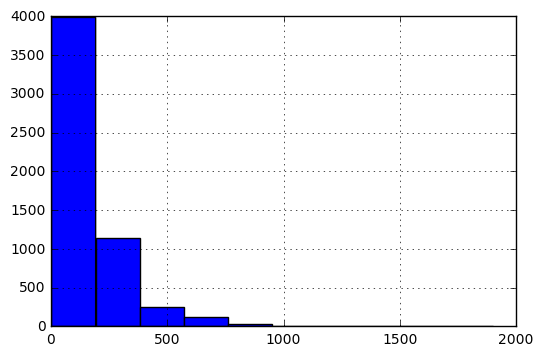

In [9]:
bienici['charges'].hist()
plt.show()

5528


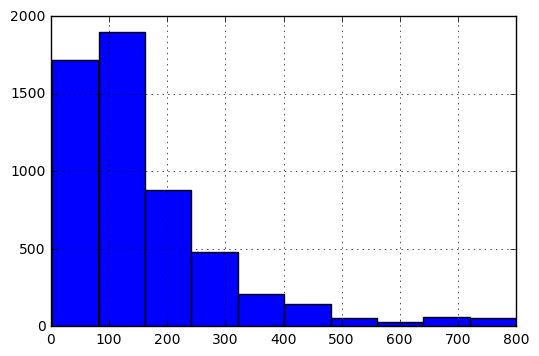

In [10]:
# Remove ads with charges > max_charge €/month
max_charge = 800
position_keep_charges = bienici["charges"] <= max_charge
bienici = bienici.ix[position_keep_charges,:]
print(len(bienici))

bienici['charges'].hist()
plt.show()

### DESCRIPTION cleaning

In [11]:
descriptions = np.asarray(bienici["description"])
def clear_description(descr):
    descr = descr.replace("&eacute;", "é")
    descr = descr.replace("&Eacute;", "É")
    descr = descr.replace("&egrave;", "è")
    descr = descr.replace("&Egrave;", "È")
    descr = descr.replace("&sup2;", "²")
    descr = descr.replace("&agrave;", "à")
    descr = descr.replace("&ccedil;", "ç")
    descr = descr.replace("&ucirc;", "û")
    descr = descr.replace("&Ucirc;", "Û")
    descr = descr.replace("&acirc;", "â")
    descr = descr.replace("&Acirc;", "Â")
    descr = descr.replace("&ecirc;", "ê")
    descr = descr.replace("&Ecirc;", "Ê")
    descr = descr.replace("&ocirc;", "ô")
    descr = descr.replace("&Ocirc;", "Ô")
    descr = descr.replace("&icirc;", "î")
    descr = descr.replace("&Icirc;", "Î")
    descr = descr.replace("&nbsp;", " ")
    descr = descr.replace("&euro;", "€")
    descr = descr.replace("&deg;","°")
    descr = descr.replace("�","é")
    descr = descr.replace("<br>"," ")
    descr = descr.replace("</br>"," ")
    descr = descr.replace("<br/>"," ")
    descr = descr.replace("<p>"," ")
    descr = descr.replace("</p>"," ")
    descr = descr.replace("<u>","")
    descr = descr.replace("</u>","")
    descr = descr.replace("<em>","")
    descr = descr.replace("</em>","")
    descr = descr.replace("description html_format --","")
    
    # All the text lowercase
    descr = str.lower(descr)
    
    return descr

In [12]:
bienici['description'] = bienici['description'].apply(clear_description,0)

### Analysis of the column 'price'

In [13]:
bienici["price"].count()/len(bienici)

1.0

Some prices are indicated as 'price_1 à price_2'. We have to remove these lines.

In [14]:
def get_weird(x):
    return re.compile("[0-9]+\sà").match(x) is None

position_weird_price = bienici["price"].apply(get_weird, 0)
print("%s lines with incorrect price" %(len(bienici)-sum(position_weird_price)))

0 lines with incorrect price


In [15]:
# Remove lines with incorrect price
bienici = bienici.ix[position_weird_price,:]
bienici['price'] = bienici['price'].astype(float)
len(bienici)

5528

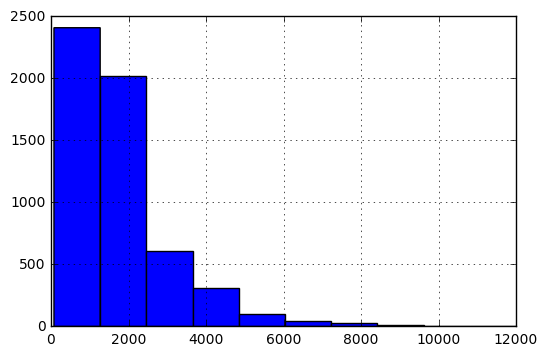

In [16]:
bienici['price'].hist()
plt.show()

### Analysis of the column 'charges'

If the charges are not know, their value is 'NaN'. These lines are useless, we can remove them.

In [17]:
def get_non_missing_arg(x):
    return str(x) != 'nan'

position_known_charge = bienici["charges"].apply(get_non_missing_arg, 1)
print("Charge present in %s%% of the lines" %(100*round(sum(position_known_charge)/len(bienici),3)))
print("%s lines with unknown charges" %(len(bienici)-sum(position_known_charge)))

Charge present in 100.0% of the lines
0 lines with unknown charges


In [18]:
# Remove lines where charges are unknown
bienici = bienici.ix[position_known_charge,:]
print(len(bienici))

5528


### District

In [19]:
def get_district(place):
    regex = re.compile("Paris\s[0-9]+").match(place)
    if regex:
        district = regex.group(0)
        district = int(district.replace('Paris',''))
        if district <= 20:
            return district
        else:
            return -1
    else:
        if 'Grandes Carrières - Clichy' or 'Jules Joffrin' in place:
            return 18
        return -1

district = np.asarray(bienici["place"].apply(get_district, 0))

print("%s unknown districts (removed):" %sum(district==-1))
for i in range(len(district)):
    if district[i] == -1:
        print("- %s" %np.asarray(bienici["place"])[i])
print()

# Remove lines where district is -1 (district not recognized)
bienici = bienici.ix[district!=-1,:]

print(len(bienici))

3 unknown districts (removed):
- Paris 92240
- Paris 75000
- Paris 75000

5525


### Analysis of surface

In [20]:
print("Charge present in %s %% of the lines" %(100*round(bienici["surface"].count()/len(bienici),3)))
print("%s lines with missing surface" %(len(bienici) - round(bienici["surface"].count())))

Charge present in 99.5 % of the lines
27 lines with missing surface


In [21]:
# Remove the lines where surface not known
position_known_surface = bienici["surface"].apply(get_non_missing_arg, 1)
bienici = bienici.ix[position_known_surface,:]
print(len(bienici))

5498


### Analysis of construction year

In [22]:
print("Charge present in %s%% of the lines" %(100*round(bienici['construction_year'].count()/len(bienici),3)))

Charge present in 37.7% of the lines


This feature is not relevant !

### Analysis of the number of pictures

In [23]:
print("Nb pictures present in %s%% of the lines"
      %(100*round(bienici['number_pictures'].count()/len(bienici),3)))

Nb pictures present in 100.0% of the lines


Relevance of this feature ? To be studied.

### furnished

If the attribute 'furnished'is 'Yes' in the database, we are sure that the flat is furnished. Else, this information was not given directly by bienici. In that case, I check in the text description if some related information is present, for more accuracy.

In [24]:
def furnished_sure(x):
    ret = False
    if x == 'Yes':
        ret = True
    return ret
# vec_furnished gives the position of ads where it is sure that furnished is true
vec_furnished_sure = np.asarray(bienici["furnished"].apply(furnished_sure, 1)).astype(int)

def furnished_from_mining(x):
    ret = False
    if 'meublé' in x and 'non meublé' not in x and 'non-meublé' not in x and 'non meuble' not in x\
    and 'non-meuble' not in x:
        ret = True
    return ret
# vec_furnished_minig gives the position of ads where we found that the flat is furnished, thanks to the description
vec_furnished_mining = np.asarray(bienici["description"].apply(furnished_from_mining, 1)).astype(int)

vec_furnished = vec_furnished_sure + vec_furnished_mining
vec_furnished = (vec_furnished >= 1).astype(int) # 0/1 format

In [25]:
#for descr in np.asarray(bienici['description']):
#    print(descr)

### Lift

We can consider that the lift is an important element. Then, if a lift is not mentioned, we can imagine there is none for this flat.

In [26]:
def get_lifts():
    def lift_present_descr(x):
        lift = False
        if 'ascenseur' in x and 'sans ascenseur' not in x and 'pas ascenseur' not in x:
            lift = True
        elif 'ascenceur' in x and 'sans ascenceur' not in x and 'pas ascenceur' not in x:
            # ascenceur is misspellt, but is present in the descriptions !
            lift = True
        return lift
    def lift_present_sure(x):
        lift = False
        if x==1:
            lift = True
        return lift

    lifts_descr = np.asarray(bienici["description"].apply(lift_present_descr, 1)).astype(int)
    lifts_sure = np.asarray(bienici["lift"].apply(lift_present_sure, 1))
    
    lifts = lifts_descr + lifts_sure
    lifts = (lifts >= 1).astype(int)

    return lifts

In [27]:
position_lift = get_lifts()

In [28]:
nb_lifts = sum(position_lift)
print("Lift present in %s%% of the advertisment (%s/%s)" %(round(100*nb_lifts/len(bienici),3),nb_lifts,len(bienici)))

Lift present in 59.858% of the advertisment (3291/5498)


This proportion makes sense.

### Number of rooms

In [29]:
position_known_rooms = np.asarray(bienici["number_rooms"].apply(get_non_missing_arg, 1))
print("%s missing nb of rooms" %(len(bienici)-sum(position_known_rooms)))

22 missing nb of rooms


When the number of rooms is missing:
* if the word 'studio' is present in the description or if 'chambre' is one of the first words of the description, the number of rooms is estimeted to 1
* if the words 'f2' or '2 pièces' or '2 pieces' etc are present in the description, the number of rooms is estimeted to 2
* if the word 'f3' or '3 pièces' or '3 pieces' etc are present in the description, the number of rooms is estimeted to 3
* else, the number of rooms is estimeted with the median

In [30]:
vec_rooms = np.asarray(bienici["number_rooms"]).astype(int)
median_rooms = bienici["number_rooms"].where(vec_rooms).median()
print('Median: %s' %median_rooms)

for i in range(len(position_known_rooms)):
    if position_known_rooms[i] == False:
        #print(i)
        descr = np.asarray(bienici["description"])[i]
        if 'studio' in descr or 'chambre' in descr.split(' ')[:3]:
            vec_rooms[i] = 1
        elif 'f2 ' in descr or '2 pièces' in descr or '2 pieces' in descr \
        or 'deux pièces' in descr or 'deux pieces' in descr:
            vec_rooms[i] = 2
        elif 'f3 ' in descr or '3 pièces' in descr or '3 pieces' in descr\
        or 'trois pièces' in descr or 'trois pieces' in descr:
            vec_rooms[i] = 3
        else:
            vec_rooms[i] = median_rooms

Median: 2.0


### Floor
As shown in the other notebook, this feature is not that relevant

### Heating

In [31]:
def get_coll(system):
    if re.compile("collectif").match(system):
        return "collectif"
    elif 'individuel' in system:
        return "individuel"
    else:
        return "unknown"
    
heating_known = np.asarray(bienici["heating"].astype(str).apply(get_coll, 0))
#bienici["heating_sys"].value_counts()

In [32]:
def update_heating_with_description(heating_known):
    heating = heating_known.copy()
    descriptions = np.asarray(bienici['description'])
    def get_heating(descr, key_word):
        descr = descr.replace('.',' ').replace(';',' ').replace(',',' ').replace(':',' ').replace('-', ' ')
        if key_word in descriptions[i]:
            descr = descr.replace(key_word, ' ' + key_word + ' ')
            descr = descr.split(' ')
            descr = list(filter(lambda a: a != '', descr))
            index_heating = descr.index(key_word)

            next_words = ''
            for j in range(min(6,len(descr)-index_heating)):
                next_words += descr[index_heating+j]

            if 'collectif' in next_words or 'collectifs' in next_words:
                return 'collectif'
            elif 'individuel' in next_words or 'individuels' in next_words or 'ind' in next_words:
                return'individuel'
        return 'unknown'

    for i in range(len(heating)):
        if heating[i] == 'unknown':
            descr = descriptions[i]
            ret = get_heating(descr, 'chauffage')
            if ret == 'unknown':
                ret = get_heating(descr, 'chaudière')        
            heating[i] = ret
    return heating

heating = update_heating_with_description(heating_known)

In [33]:
pd.DataFrame(heating)[0].value_counts()

unknown       2671
collectif     1421
individuel    1406
Name: 0, dtype: int64

**Warning !** About half of these values are unknown...

In [34]:
def get_source(system):
    system = system.replace('é', 'e')
    if "electricite" in system or "electrique" in system:
        return "electricite"
    elif "gaz" in system:
        return "gaz"
    elif "fuel" in system or "fioul" in system:
        return "fuel"
    else:
        return "unknown"

def get_source_from_description(heating_source_known):
    descriptions = np.asarray(bienici["description"])
    source = heating_source_known.copy()
    for i in range(len(descriptions)):
        if source[i] == 'unknown':
            descr = descriptions[i].replace('é', 'e')
            if "electricite" in descr or "electrique" in descr:
                source[i] = "electricite"
            elif "gaz" in descr:
                source[i] = "gaz"
            elif "fuel" in descr or "fioul" in descr:
                source[i] = "fuel"
    return source
        
    
heating_source_known = np.asarray(bienici["heating"].astype(str).apply(get_source, 0))
heating_source = get_source_from_description(heating_source_known)

pd.DataFrame(heating_source)[0].value_counts()

unknown        3773
electricite     979
gaz             707
fuel             39
Name: 0, dtype: int64

** Warning !** A lot of missing values !

### Gardien

In [35]:
def find_gardien(x):
    if 'gardien' in x:
        return True
    else:
        return False

gardien = np.asarray(bienici["description"].apply(find_gardien, 0))
print(pd.DataFrame(gardien)[0].value_counts())
print('\nGardien in %s%% of cases' %(round(100*pd.DataFrame(gardien)[0].value_counts()[1]/len(gardien),2)))

False    4384
True     1114
Name: 0, dtype: int64

Gardien in 20.26% of cases


$\rightarrow$ Coherent with intuition

### Internet

In [36]:
def find_internet(x):
    if 'internet' in x:
        return True
    else:
        return False

internet = np.asarray(bienici["description"].apply(find_internet, 0))
print(pd.DataFrame(internet)[0].value_counts())
print('\nGardien in %s%% of cases' %(round(100*pd.DataFrame(internet)[0].value_counts()[1]/len(internet),2)))

False    5442
True       56
Name: 0, dtype: int64

Gardien in 1.02% of cases


In [37]:
#df_temp = pd.DataFrame(internet)
#df_temp.columns = ['internet']
#df_temp['Charges'] = np.asarray(bienici["charges"]).astype(float)
#df_temp.boxplot(by = "internet")
#plt.show()

### Garden

Not that relevant...

In [38]:
def find_garden(x):
    if 'jardin' in x:# and 'sur jardin' not in x:
        return True
    else:
        return False

garden = np.asarray(bienici["description"].apply(find_garden, 0))
print(pd.DataFrame(garden)[0].value_counts())
print('\nGardien in %s%% of cases' %(round(100*pd.DataFrame(garden)[0].value_counts()[1]/len(garden),2)))

False    5104
True      394
Name: 0, dtype: int64

Gardien in 7.17% of cases


In [39]:
#df_temp = pd.DataFrame(garden)
#df_temp.columns = ['Garden']
#df_temp['Charges'] = np.asarray(bienici["charges"]).astype(float)
#df_temp.boxplot(by = "Garden")
#plt.show()

# Creation of the dataset

In [40]:
dataset = pd.DataFrame()

# Price of the flat
price = np.asarray(bienici["price"]).astype(float)
dataset['Price'] = price

# Charges (target value)
charges = np.asarray(bienici["charges"]).astype(float)
dataset['Charges'] = charges

# Surface of the flat
surface = np.asarray(bienici["surface"]).astype(float)
dataset['Surface'] = surface

# Number of pictures in the advertisment
# relevant ?
nb_pictures = np.asarray(bienici["number_pictures"]).astype(float)
dataset['Nb_pictures'] = nb_pictures
dataset['Nb_pictures'] = dataset['Nb_pictures'].astype(int)

# Is the flat furnished ?
# 0 = No, 1 = Yes
furnished = vec_furnished
dataset['Furnished'] = furnished

# Is there a lift ?
# 0 = No, 1 = Yes
lift = np.asarray(position_lift).astype(int)
dataset['Lift'] = lift

# Number of rooms in that flat
nb_rooms = vec_rooms
dataset['Nb_rooms'] = nb_rooms

# District of Paris ('arrondissement')
# Qualitative => get dummies => 20 features (sparse)
dummies_district = pd.get_dummies(pd.DataFrame(district)[0]).rename(columns=lambda x: 'Paris_' + str(x))
dummies_district = dummies_district.drop(['Paris_-1'],1)
dummies_district = dummies_district.astype(int)
dataset[dummies_district.columns] = dummies_district

# Heating
# A lot of missing values...
# 3 possible values: 'collectif', 'individuel', 'unknown' => get dummies
dummies_heating = pd.get_dummies(pd.DataFrame(heating)[0]).rename(columns=lambda x: 'Heating_' + str(x))
dummies_heating = dummies_heating.astype(int)
dataset[dummies_heating.columns] = dummies_heating

# Heating type
# A lot of missing values...
# Qualitative => get dummies
dummies_heating_src = pd.get_dummies(pd.DataFrame(heating_source)[0])\
.rename(columns=lambda x: 'Heating_src_' + str(x))
dummies_heating_src = dummies_heating_src.astype(int)
dataset[dummies_heating_src.columns] = dummies_heating_src

# Gardien
# True if sure there is one
dataset['Gardien'] = gardien.astype(int)

# Internet
# True if internet provided
dataset['Internet'] = internet.astype(int)

# Garden
# True if 'garden' is in the description
dataset['Garden'] = garden.astype(int)

In [41]:
dataset.head(3)

,Price,Charges,Surface,Nb_pictures,Furnished,Lift,Nb_rooms,Paris_1,Paris_2,Paris_3,...,Heating_collectif,Heating_individuel,Heating_unknown,Heating_src_electricite,Heating_src_fuel,Heating_src_gaz,Heating_src_unknown,Gardien,Internet,Garden
0,1150.0,70.0,36.0,6,1,0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1150.0,70.0,36.0,6,1,0,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2165.0,165.0,85.0,11,0,1,3,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [42]:
def print_features_names(dataset):
    list_features = list(dataset.columns)
    if 'Charges' in list_features:
        list_features.remove('Charges') # Charge is the estimated value
    string = "Current features (%s):" %len(list_features)
    for feature in list_features:
        string += "\n  - %s" %feature
    print(string)
    
#print_features_names(dataset)

##### Kitchen, bathroom, WC/douche sur pallier ?

# Apply filters to work on a part of the data only

In [43]:
limit_charges = False

limit_price = True
price_max = 3000

In [44]:
if limit_charges:
    charges_max = 200
    def criterium(x):
        return x <= charges_max
    positions_lines_to_keep = dataset['Charges'].apply(criterium, 1)
    dataset = dataset.ix[positions_lines_to_keep]
    
if limit_price:
    price_max = price_max
    def criterium(x):
        return x <= price_max
    positions_lines_to_keep = dataset['Price'].apply(criterium, 1)
    dataset = dataset.ix[positions_lines_to_keep]

In [45]:
print("%s tuples kept" %len(dataset))

4729 tuples kept


In [46]:
objective = dataset['Charges']
features = dataset.drop(['Charges'], 1)
price = np.asarray(dataset['Price'])
dataset = None

# Standardization

In [47]:
standardize = True

In [48]:
if standardize:
    def standardize_features(features):
        "features is a DataFrame"
        scaler = preprocessing.StandardScaler(with_mean=True, with_std=True).fit(features)

        # Need to keep the mean and std, in order to make the same transformations on new data for prediction
        mean = scaler.mean_
        std = scaler.scale_
        
        features_scaled = scaler.transform(features)
        
        list_features_names = list(features.columns)
        features = pd.DataFrame(features_scaled, columns=list_features_names)
        
        return features, mean, std
    
    def standardize_objective(data):
        mean = np.mean(data)
        std = np.std(data)
        data_scales = (data - mean)/std
        return data_scales, mean, std
    
    
    features, features_mean, features_std = standardize_features(features)
    
    
    objective, objective_mean, objective_std = standardize_objective(objective) 

# Feature selection

In [49]:
print("Columns: %s" %features.columns)

Columns: Index(['Price', 'Surface', 'Nb_pictures', 'Furnished', 'Lift', 'Nb_rooms',
       'Paris_1', 'Paris_2', 'Paris_3', 'Paris_4', 'Paris_5', 'Paris_6',
       'Paris_7', 'Paris_8', 'Paris_9', 'Paris_10', 'Paris_11', 'Paris_12',
       'Paris_13', 'Paris_14', 'Paris_15', 'Paris_16', 'Paris_17', 'Paris_18',
       'Paris_19', 'Paris_20', 'Heating_collectif', 'Heating_individuel',
       'Heating_unknown', 'Heating_src_electricite', 'Heating_src_fuel',
       'Heating_src_gaz', 'Heating_src_unknown', 'Gardien', 'Internet',
       'Garden'],
      dtype='object')


### Selection "manually"

In [50]:
# The price from bieici is set by agencies, but the purpose is to
# use this tools on ads from websites like pap or leboncoin
# => The price of agencies can introduce a bias, so we don't keep it
#features = features.drop(["Price"], 1)

features = features.drop(["Nb_pictures"], 1)

# The districts variable are totally correlated. We should remove one of them
features = features.drop(["Paris_1"], 1)

# Heating_collectif, Heating_individuel, Heating_unknown are totally correlated
# Remove Heating_unknown
features = features.drop(["Heating_unknown"], 1)

# Heating_src_electricite, Heating_src_fuel, Heating_src_gaz, Heating_src_unknown
# Remove Heating_src_unknown
features = features.drop(["Heating_src_unknown"], 1)

# Garden: does not improve the score
features = features.drop(["Garden"], 1)

In [51]:
print_features_names(features)

Current features (31):
  - Price
  - Surface
  - Furnished
  - Lift
  - Nb_rooms
  - Paris_2
  - Paris_3
  - Paris_4
  - Paris_5
  - Paris_6
  - Paris_7
  - Paris_8
  - Paris_9
  - Paris_10
  - Paris_11
  - Paris_12
  - Paris_13
  - Paris_14
  - Paris_15
  - Paris_16
  - Paris_17
  - Paris_18
  - Paris_19
  - Paris_20
  - Heating_collectif
  - Heating_individuel
  - Heating_src_electricite
  - Heating_src_fuel
  - Heating_src_gaz
  - Gardien
  - Internet


### Denoising: PCA

#### PCA Analysis

In [52]:
y = np.asarray(objective)
X = np.asarray(features)

In [53]:
print("Dataset: %s samples, %s features" %(X.shape))

Dataset: 4729 samples, 31 features


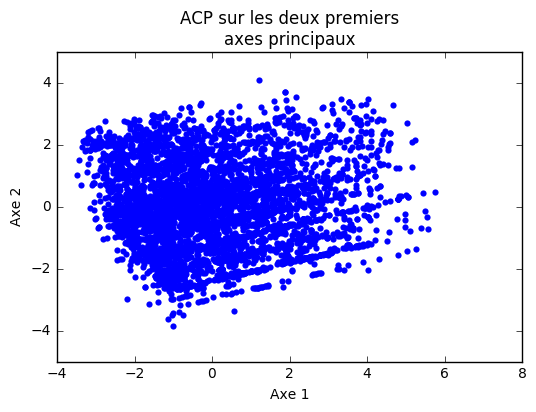

In [54]:
pca = PCA()
X2 = pca.fit(X).transform(X)

plt.scatter(X2[:, 0], X2[:, 1], label=" ", linewidth='0')
plt.xlabel("Axe 1")
plt.ylabel("Axe 2")
plt.title('ACP sur les deux premiers\naxes principaux')
plt.show()

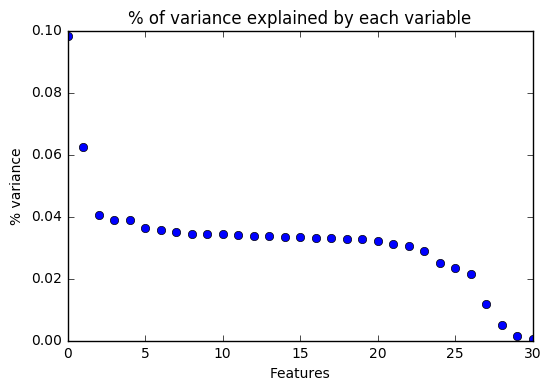

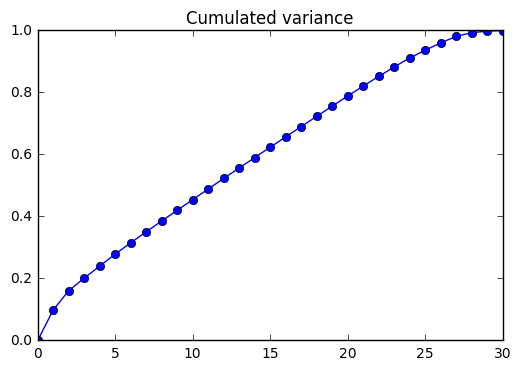

In [55]:
plt.plot(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_, 'o')
plt.title('% of variance explained by each variable')
plt.xlabel('Features')
plt.ylabel('% variance')
plt.show()

var_explained = []
for i in range(len(pca.explained_variance_ratio_)):
    var_explained.append(sum(pca.explained_variance_ratio_[:i]))
plt.plot(range(len(pca.explained_variance_ratio_)),var_explained, '-o')
plt.title('Cumulated exlained variance\nwith respect to the number of features kept')
plt.title('nb features')
plt.title('Cumulated variance')
plt.show()

In [56]:
# Axes:
# USE ZIP to print with names of axes !
#for i in range(15):
#    print(pca.components_[i])

#### PCA Application

In [57]:
apply_pca = False
# The use of PCA did not help improving the results

In [58]:
if apply_pca:
    # Remove the n last axis
    n = 2
    pca = PCA(n_components=features.shape[1]-n)
    X = pca.fit(X).transform(X)

In [59]:
X.shape

(4729, 31)

# Creation of the training and test sets

In [60]:
rs = ShuffleSplit(n_splits=1, test_size=0.25)
a = rs.split(X)

for train, test in a:
    train_index = train
    test_index = test

X_test = X[test_index]
X_train = X[train_index]
price_test = price[test_index]

y_test = y[test_index]
y_train = y[train_index]

# Reconstruct y_test (mean and std)
y_test = y_test*objective_std + objective_mean

In [61]:
x_temp = pd.DataFrame(X_test)
x_temp.to_csv('essai_x.csv')

# Our regressor: Random Forest

Hyperparameters to optimize:
* Max depth of the trees
* Number of trees

In [62]:
from sklearn.ensemble import RandomForestRegressor
rndForest = RandomForestRegressor()

In [63]:
def get_performances(y_hat, y_test):
    errors = y_test - y_hat
    error_abs = np.abs(errors)
    relative_error = error_abs / y_test * 100

    percentiles = [25, 50, 75, 90]
    print("Avg error: %s" %np.mean(error_abs))
    #print("Percentiles errors: %s\n" %np.percentile(error_abs, [25, 50, 75, 90]))
    print("Percentiles errors: %s (for percentiles %s)\n" %(np.percentile(error_abs, [25, 50, 75, 90]), percentiles))

    print("Avg relative error: %s" %np.mean(relative_error))
    print("Percentiles relative errors: %s\n" %np.percentile(relative_error, [25, 50, 75, 90]))

    return errors, error_abs, relative_error

In [64]:
hyper_param_cv = False
run_random_forest = True

In [65]:
if run_random_forest:
    if hyper_param_cv:
        parameters = {'n_estimators':[10, 100, 500, 1000],
                          'max_depth':[10, 100, 1000, 3000, None],
                          'n_jobs':[-1]}

        regr = GridSearchCV(rndForest, parameters, n_jobs=2)
        regr.fit(X_train, y_train)

        print("Best parameters: %s" %regr.best_params_)
        print("Best score: %s" %regr.best_score_)

        regressor = regr.best_estimator_.fit(X_train, y_train)


    else:
        rndForest.set_params(n_estimators = 1000)
        regressor = rndForest.fit(X_train, y_train)

    y_hat = regressor.predict(X_test)

    if standardize:
        y_hat = y_hat*objective_std + objective_mean
    
    errors, error_abs, relative_error = get_performances(y_hat, y_test)

Avg error: 29.434248599
Percentiles errors: [  7.6055      20.484       41.40761905  68.8086    ] (for percentiles [25, 50, 75, 90])

Avg relative error: 30.4424974494
Percentiles relative errors: [  7.14214286  20.48181818  40.21337294  71.28770769]



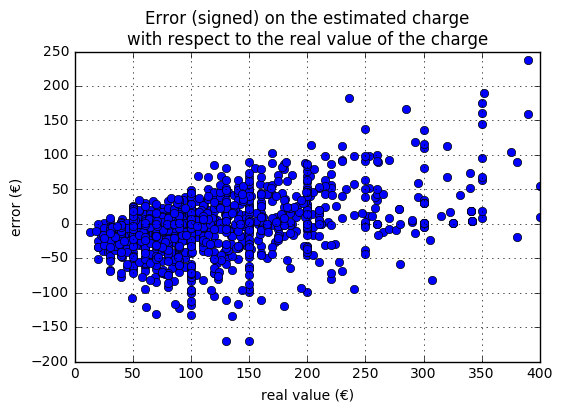

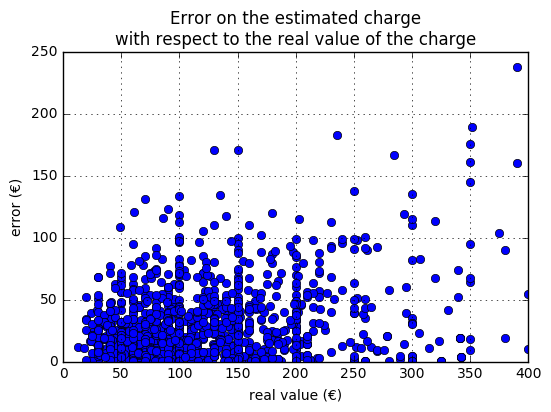

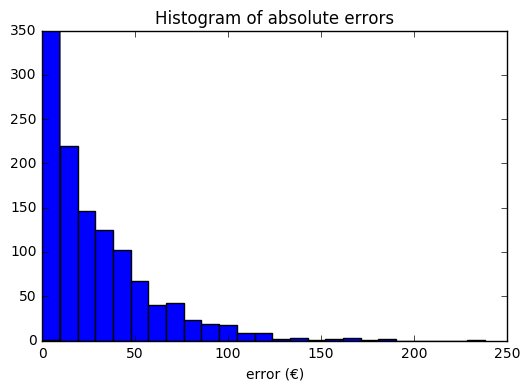

In [66]:
if run_random_forest:
    # Visualize the repartition of errors
    plt.plot(y_test, errors, 'o')
    plt.title("Error (signed) on the estimated charge\nwith respect to the real value of the charge")
    plt.ylabel("error (€)")
    plt.xlabel("real value (€)")
    plt.grid()
    plt.show()

    plt.plot(y_test, error_abs, 'o')
    plt.title("Error on the estimated charge\nwith respect to the real value of the charge")
    plt.ylabel("error (€)")
    plt.xlabel("real value (€)")
    plt.grid()
    plt.show()

    plt.hist(error_abs, bins=25)
    plt.title("Histogram of absolute errors")
    plt.xlabel("error (€)")
    plt.show()

    #plt.plot(y_test, relative_error, 'o')
    #plt.title("Avg error on the estimated charge\nwith respect to the real value of the charge")
    #plt.ylabel("error (%)")
    #plt.xlabel("real value (€)")
    #plt.show()

# A second regressor: xgboost

# Export our model

In [68]:
objective_std

78.80818240182575

In [69]:
objective_mean

124.9107633749207

In [73]:
# Save the model in a file.
from sklearn.externals import joblib
if run_random_forest:
    name = 'charges_predictor.pkl'
    joblib.dump(regressor, name, compress=9)
    print('Regressor saved as %s' %name)

Regressor saved as charges_predictor.pkl


# Create the readme.txt file

In [74]:
now = datetime.datetime.now()
current_date = "%s-%s-%s" %(now.year, now.month, now.day)

In [78]:
# Create the readme.txt file

content = """Charge prediction
-----------------

The predictor is saved as a pkl object in the folder ./predictions

In order to import this regressor, run the 2 following lines:
>> from sklearn.externals import joblib
>> regressor = joblib.load('charges_predictor.pkl')

Note: scikit learn has to be installed.

This object (regressor) is a scikit-learn random forest.

If you want to predict the charge on a dataset X, run:
>> y_pred = regressor.predict(X) * %s + %s

X has to be an array where each line is a sample (an advertisement for which the charge prediction has to be made).
The columns of X are the different features. They are (is this order):
""" %(objective_std, objective_mean)

for feature in features.columns:
    content += ' - %s\n' %feature

content += """
All these features are generated on the test set in the notebook ./predictions/charge_prediction.ipynb

Each line of y_pred is the charge prediction for the corresonding line of X.

This regressor has been generated using a random forest, with scikit learn.
X_train: %s samples
X_test: %s samples

Here are a few metrics on the test of this regressor:
Avg error: %s
Percentiles errors: %s (for percentiles %s)
""" %(X_train.shape[0], X_test.shape[0], np.mean(error_abs), np.percentile(error_abs, [25, 50, 75, 90]), [25, 50, 75, 90])

In [79]:
content += "\nLast update: %s" %current_date

In [80]:
file = open('../readme.txt', 'w')
file.write(content)
file.close()

# Test: re-import the regressor

In [ ]:
# Re-import the regressor:
#regressor = joblib.load('charges_predictor.pkl')
#y_test = regressor.predict(X_test)

In [71]:
from sklearn.externals import joblib
regressor = joblib.load('charges_predictor.pkl')

TypeError: 'RandomForestRegressor' object is not callable